In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from xgboost import XGBRegressor, XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('E:\Data Science projects\Customer Churn Prediction\data\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.duplicated().any()

False

<Axes: xlabel='Exited'>

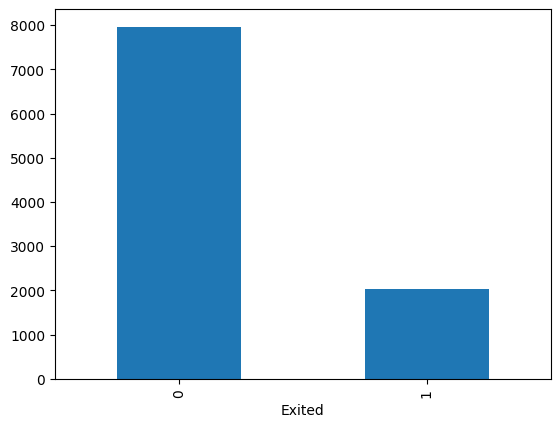

In [13]:
df['Exited'].value_counts().plot(kind='bar')

In [14]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [15]:
df = df.drop(['RowNumber','CustomerId'],axis=1)

Exited
1    7963
0    7963
Name: count, dtype: int64


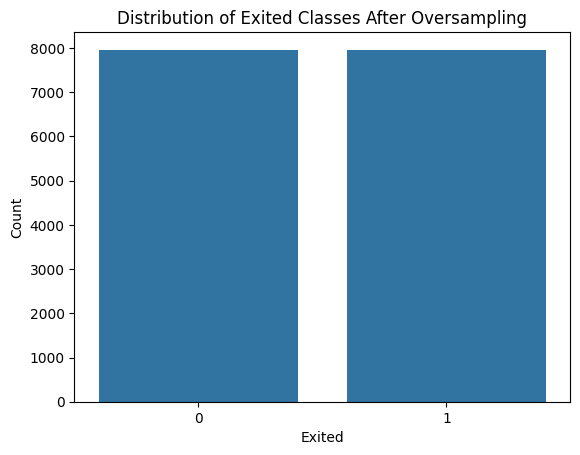

In [17]:
# Importing necessary libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Features and Target
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target

# Applying Random Oversampling to balance the classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Checking the distribution after oversampling
print(y_resampled.value_counts())

# Plotting the distribution of the target variable after oversampling
sns.countplot(x=y_resampled)
plt.title('Distribution of Exited Classes After Oversampling')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [18]:
# Preprocessing: Scaling numeric features and encoding categorical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']),
    ('cat', OneHotEncoder(handle_unknown="ignore"), ['Surname', 'Geography', 'Gender'])
], remainder='passthrough')

# Creating the pipeline with preprocessing and Logistic Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [19]:
# Splitting the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test,y_pred)

# Displaying the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.7580
Recall: 0.7862
Precision: 0.7355
Confusion Matrix:
[[1194  439]
 [ 332 1221]]


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Creating the pipeline with preprocessing and Logistic Regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Splitting the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test,y_pred)

# Displaying the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.9539
Recall: 0.9775
Precision: 0.9313
Confusion Matrix:
[[1521  112]
 [  35 1518]]


In [20]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'model__max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'model__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'model__bootstrap': [True, False]        # Method of selecting samples for training each tree
}

# Creating the pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))  # Random Forest as the model
])

# Using GridSearchCV to tune hyperparameters within the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=4, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters after GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Training the model with the best parameters
best_model = grid_search.best_estimator_

# Making predictions
y_pred = best_model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Displaying the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Confusion Matrix:\n{confusion}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters:  {'model__bootstrap': False, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Accuracy: 0.9692
Recall: 0.9742
Precision: 0.9631
Confusion Matrix:
[[1575   58]
 [  40 1513]]


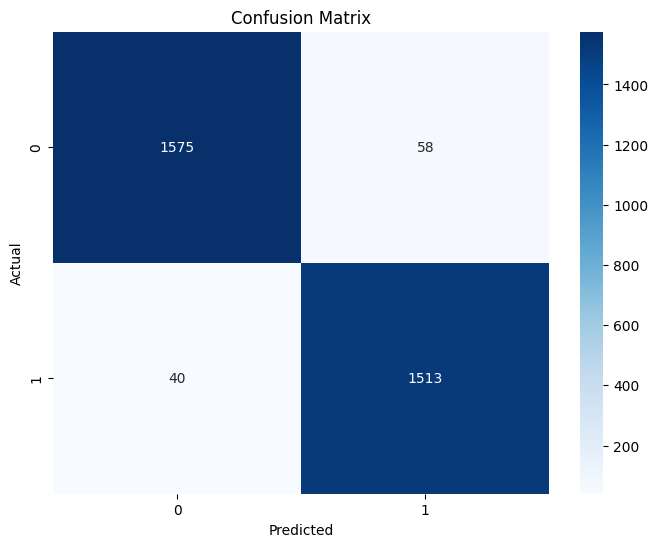

In [22]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
import joblib
import pandas as pd
import os
from sklearn.metrics import accuracy_score

# Create the directory if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

# Save the best model in the saved_models folder
joblib.dump(best_model, 'saved_models/best_random_forest_model.pkl')
print("Model saved as 'saved_models/best_random_forest_model.pkl'")

# Load the saved model
loaded_model = joblib.load('saved_models/best_random_forest_model.pkl')
print("Model loaded successfully")


Model saved as 'saved_models/best_random_forest_model.pkl'
Model loaded successfully


In [28]:
# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model's predictions
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f'Loaded Model Accuracy: {accuracy_loaded:.4f}')

# Create a DataFrame to compare predictions and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_loaded})

# Display the first few rows of the comparison
print(comparison_df.head())

# Create the directory if it doesn't exist
if not os.path.exists('predicted_output'):
    os.makedirs('predicted_output')

# Save the comparison to a CSV file in the predicted_output folder
comparison_df.to_csv('predicted_output/predicted_vs_actual.csv', index=False)
print("Comparison saved as 'predicted_output/predicted_vs_actual.csv'")

Loaded Model Accuracy: 0.9692
       Actual  Predicted
6126        0          0
7093        1          1
1659        0          0
15727       1          1
9682        0          0
Comparison saved as 'predicted_output/predicted_vs_actual.csv'
